# Student's Performance

### This project explores a dataset on students' performance across math, reading, and writing subjects. Through Exploratory Data Analysis (EDA), it investigates how factors like gender, parental education, test preparation, and lunch types may influence student outcomes.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv("dataset.csv")

In [19]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# -------------------------------
# Initial Data Exploration
# -------------------------------

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
print("\nSummary statistics for numeric columns:")
print(df.describe())


Summary statistics for numeric columns:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


### Key Insights:
- **Sample size**: All three subjects have 1000 observations, ensuring comparability across tests.
- **Average performance**: Students tend to perform slightly better in **reading (69.2)** and **writing (68.1)** than in **math (66.1)**.
- **Variation**: Standard deviations are similar (~15 points), showing comparable spread of scores across subjects.
- **Extremes**:  
  - Math has a minimum of **0**, suggesting at least one student completely failed the exam.  
  - Reading (min = **17**) and writing (min = **10**) have higher floors, indicating fewer extreme failures.  
  - Maximum = **100** across all, meaning perfect scores were achieved in every subject.
- **Quartiles**:  
  - The **middle 50%** of students (IQR) score between ~57–77 in math, 59–79 in reading, and 58–79 in writing.  
  - This suggests that most students cluster around the mean, with only a few outliers on the low end.  
- **General trend**: Reading and writing scores are consistently higher than math.


# -----------------------------
# Univariate Analysis
# -----------------------------

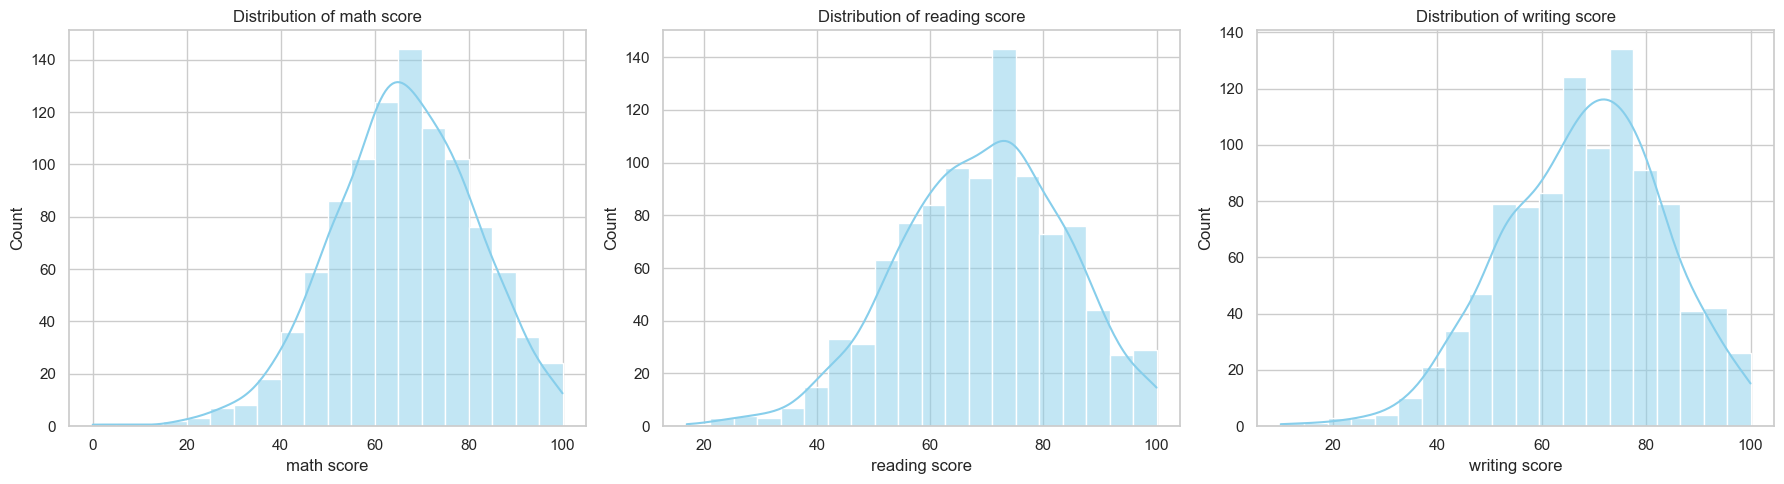

In [40]:


# Distribution of numerical variables
num_cols = ["math score", "reading score", "writing score"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=20, color="skyblue", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
plt.tight_layout()
plt.show()

### Distribution of Numerical Variables

- **Math Score**  
  - Distribution is slightly left-skewed.  
  - Most students score between **60–80**, with a few scoring below 40.  

- **Reading Score**  
  - Distribution is close to **normal (bell-shaped)**.  
  - Majority of students score around **65–80**, with relatively fewer outliers on both ends.  

- **Writing Score**  
  - Distribution is also close to **normal**, slightly skewed left.  
  - Most scores fall between **65–85**, with fewer students at very low or very high ranges.  

📌 **Overall:** Reading and writing scores are slightly higher and more balanced than math scores.  

---


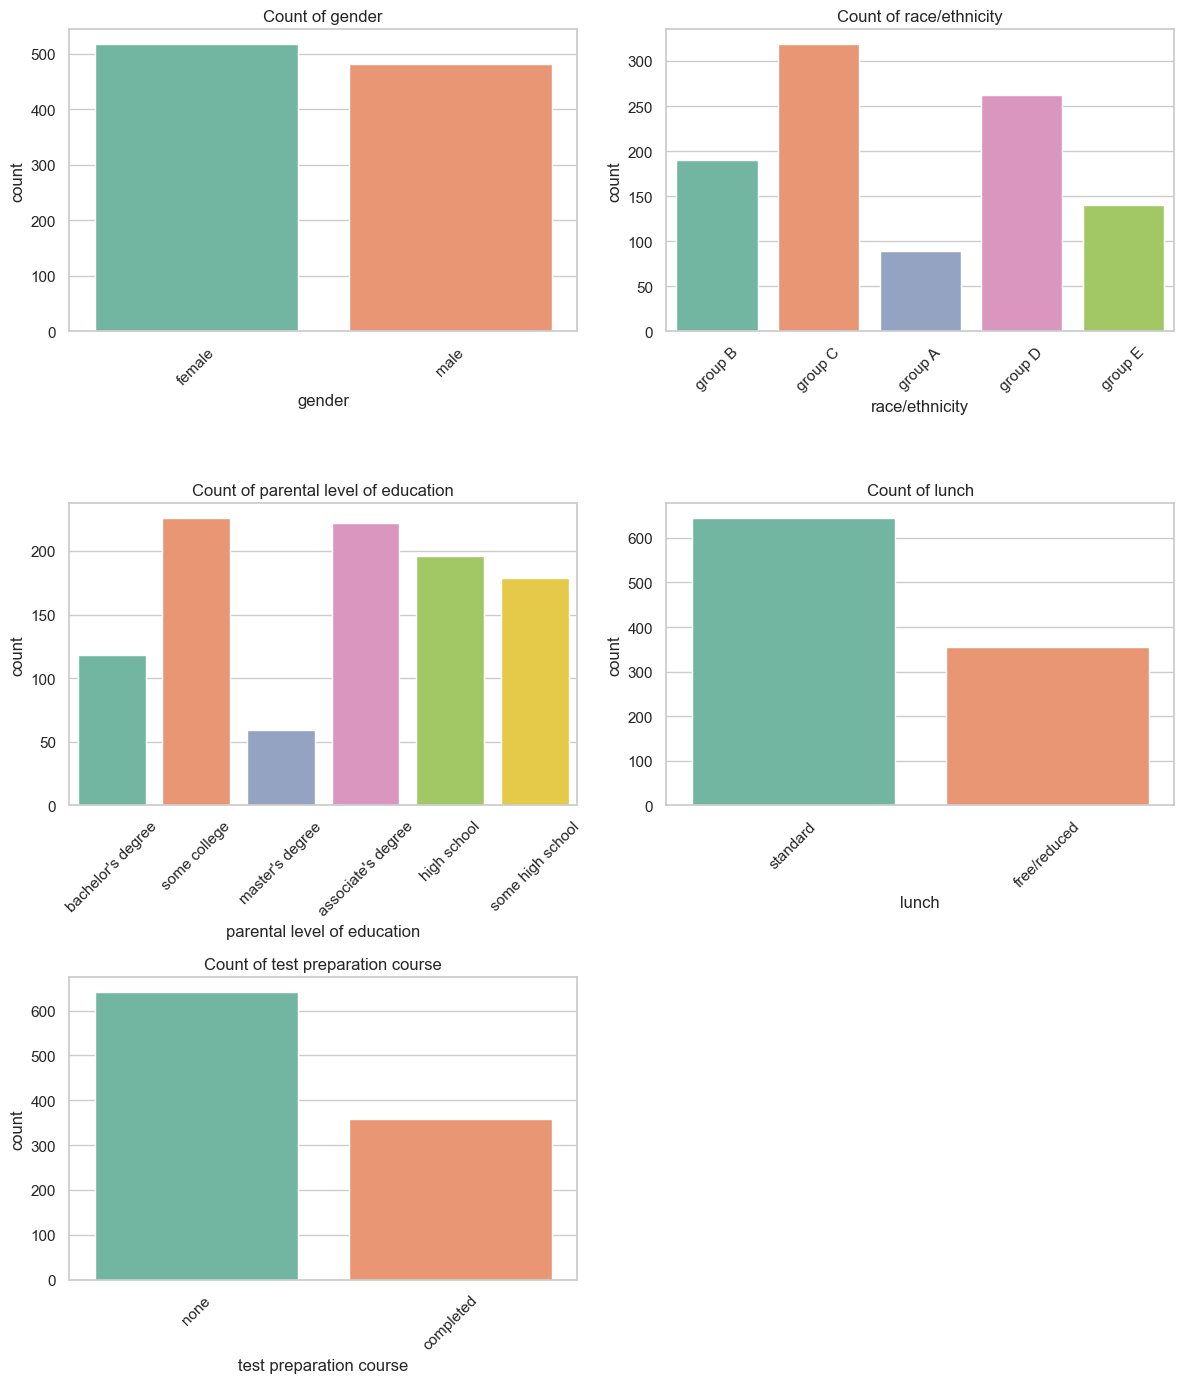

In [36]:
# Countplots for categorical variables
cat_cols = ["gender", "race/ethnicity", "parental level of education", 
            "lunch", "test preparation course"]

fig, axes = plt.subplots(3, 2, figsize=(12, 14))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue=col, palette="Set2", legend=False, ax=axes[i])
    axes[i].set_title(f"Count of {col}")
    axes[i].tick_params(axis="x", rotation=45)

# Remove last empty subplot
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Distribution of Categorical Variables

- **Gender**  
  - Balanced dataset: ~500 females, ~480 males.  

- **Race/Ethnicity**  
  - **Group C** is the largest (~320 students).  
  - **Group A** is the smallest (<100 students).  

- **Parental Level of Education**  
  - Most parents have **some college** or **associate’s degree**.  
  - Few parents hold a **master’s degree**.  

- **Lunch**  
  - Majority of students receive **standard lunch (~650)**.  
  - Around **350 students** have free/reduced lunch, indicating socioeconomic differences.  

- **Test Preparation Course**  
  - More students did **not** complete test prep (~650).  
  - ~350 students completed it, useful for performance comparison.  

📌 **Overall:** The dataset is fairly balanced by gender, but uneven by race/ethnicity and parental education.  
Socioeconomic indicators (lunch type, test prep) may significantly influence performance.  

---

# -----------------------------
# Bivariate Analysis
# -----------------------------

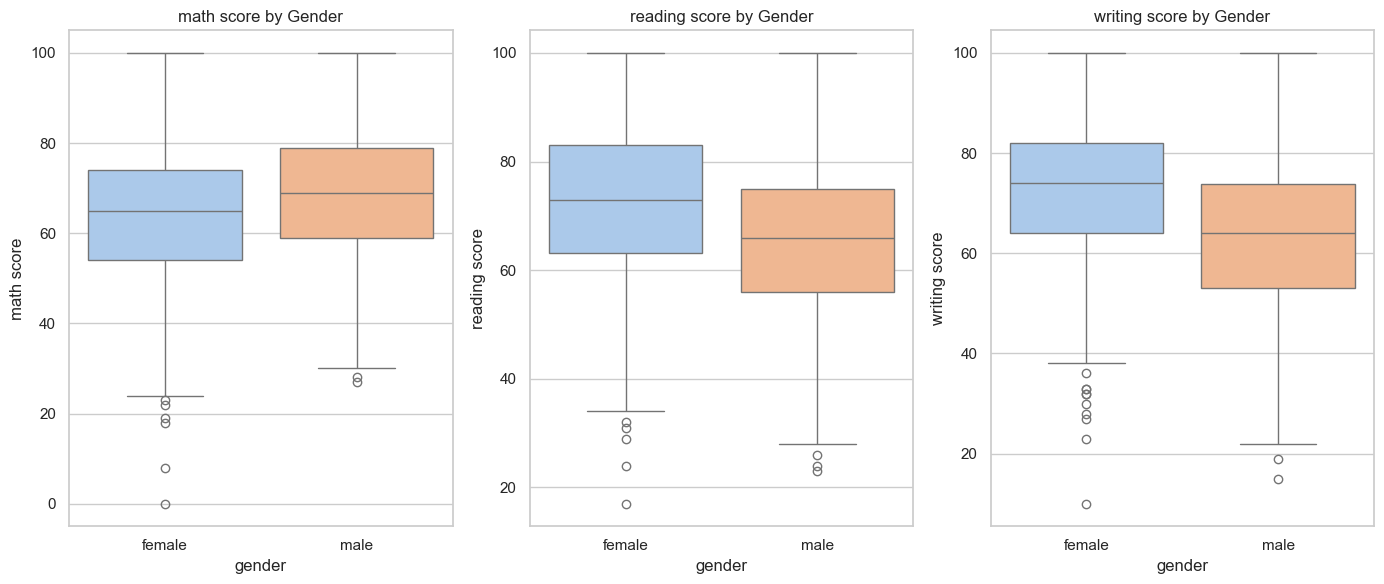

In [62]:
# Boxplots: test scores by gender
fig, axes = plt.subplots(1, 3, figsize=(14, 6))  # 1 row, 3 columns
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x="gender", y=col, hue="gender", palette="pastel", legend=False, ax=axes[i])
    axes[i].set_title(f"{col} by Gender")

plt.tight_layout()
plt.show()


### Scores by Gender  

- **Math Scores**  
  - **Males** generally score slightly higher in math.  
  - Distribution is wider, with more variability among male students.  

- **Reading Scores**  
  - **Females** clearly outperform males in reading, with a higher median and upper quartile.  

- **Writing Scores**  
  - **Females** also perform better in writing, with higher median scores compared to males.  

➡️ **Interpretation:**  
- Gender differences are evident: **males excel in math**, while **females excel in reading and writing**.  
- This reflects typical educational performance patterns observed in many academic studies.  

---

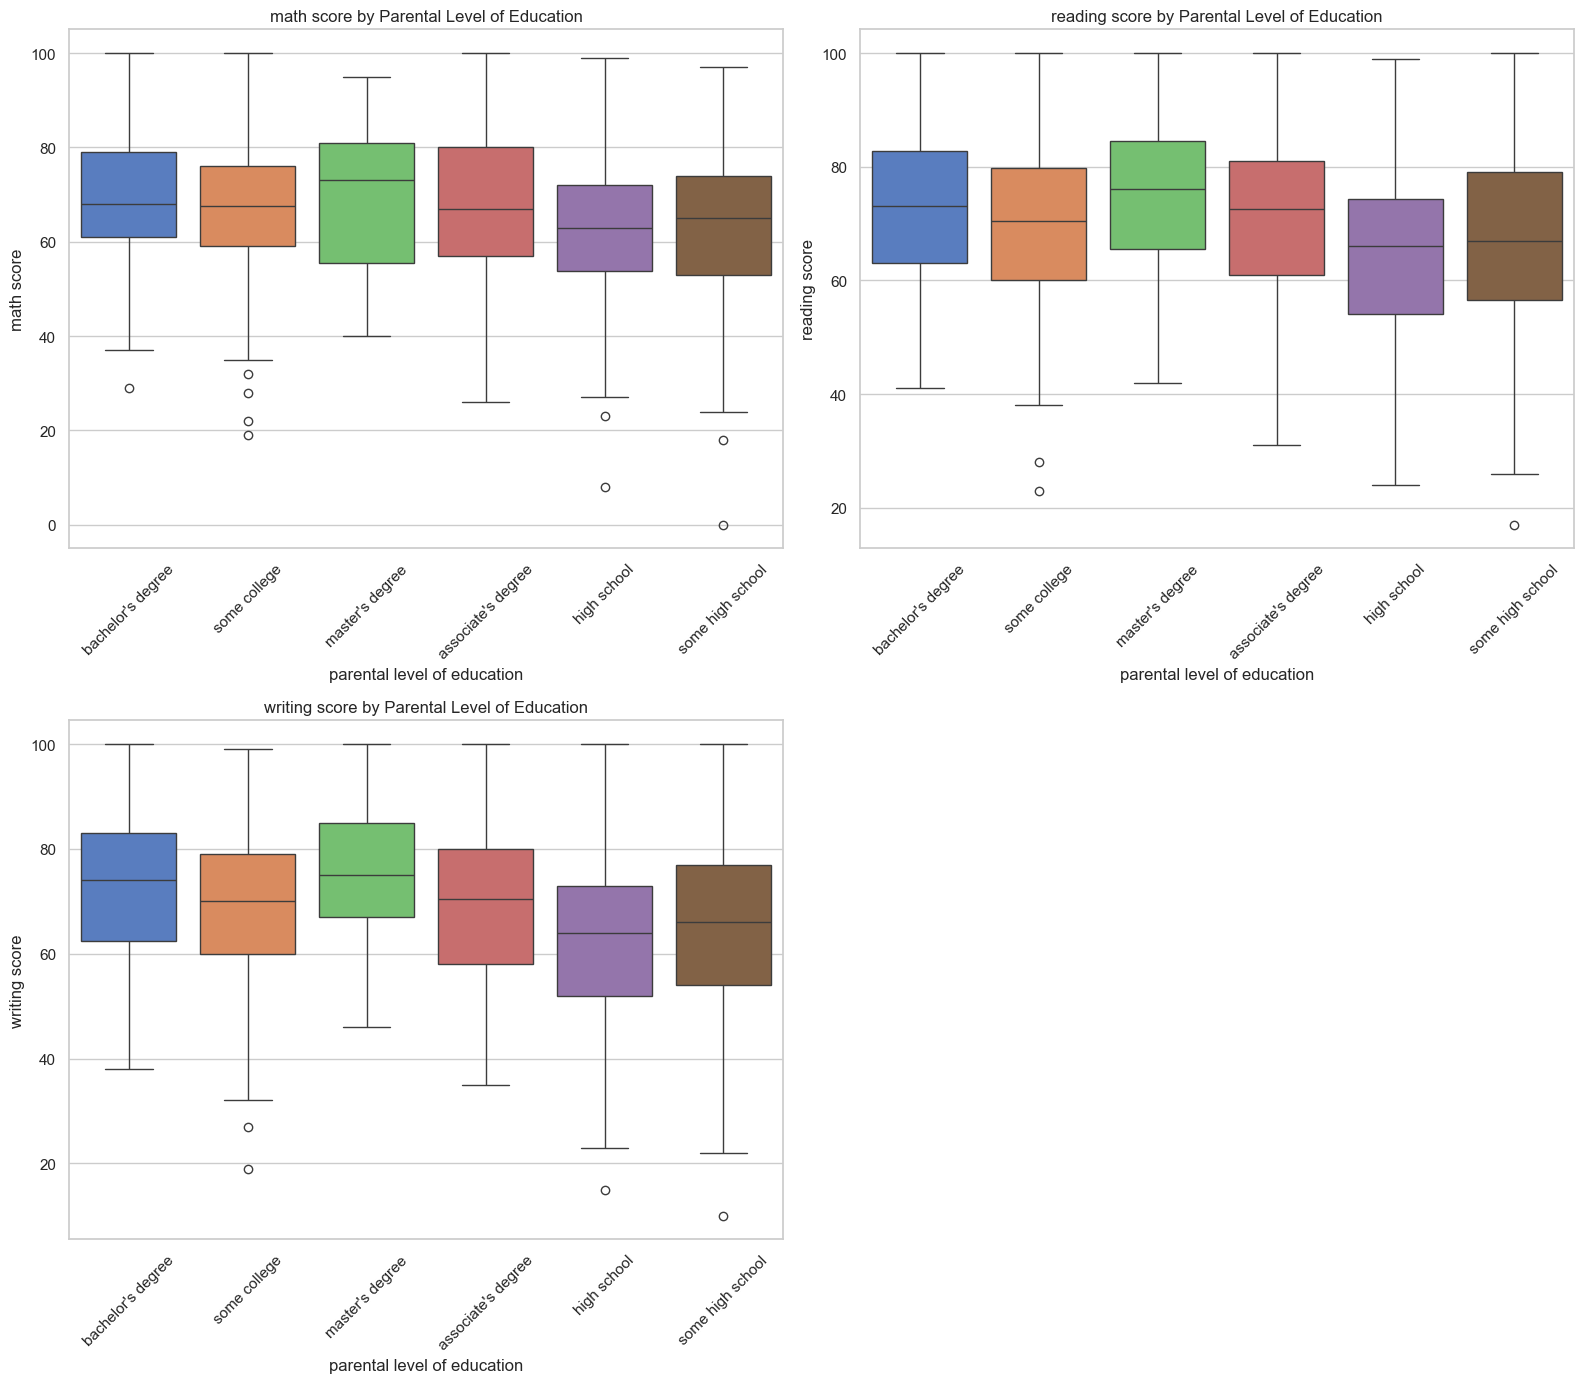

In [63]:
# Boxplots: test scores by parental education
fig, axes = plt.subplots(2, 2, figsize=(16, 14))  # 2 row, 2 columns
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x="parental level of education", y=col, hue="parental level of education", palette="muted", legend=False, ax=axes[i])
    axes[i].set_title(f"{col} by Parental Level of Education")
    axes[i].tick_params(axis="x", rotation=45)

# Remove the empty 4th subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


### Scores by Parental Education  

- **Math Scores**  
  - Students with **higher parental education (Master’s, Bachelor’s, Associate’s degrees)** tend to score slightly higher on average.  
  - Students whose parents have **only high school or some high school** education show lower median math scores and wider variability.  

- **Reading Scores**  
  - **Master’s degree** parental background shows the **highest median reading score**.  
  - Similar to math, students from families with **lower parental education** tend to have lower performance.  

- **Writing Scores**  
  - Follows the same trend: **higher parental education correlates with higher writing performance**.  
  - Students from **some high school backgrounds** perform the lowest on average.  

➡️ **Interpretation:** Parental education is positively associated with student performance across all subjects.  

---


# -----------------------------
# Multivariate Analysis
# -----------------------------


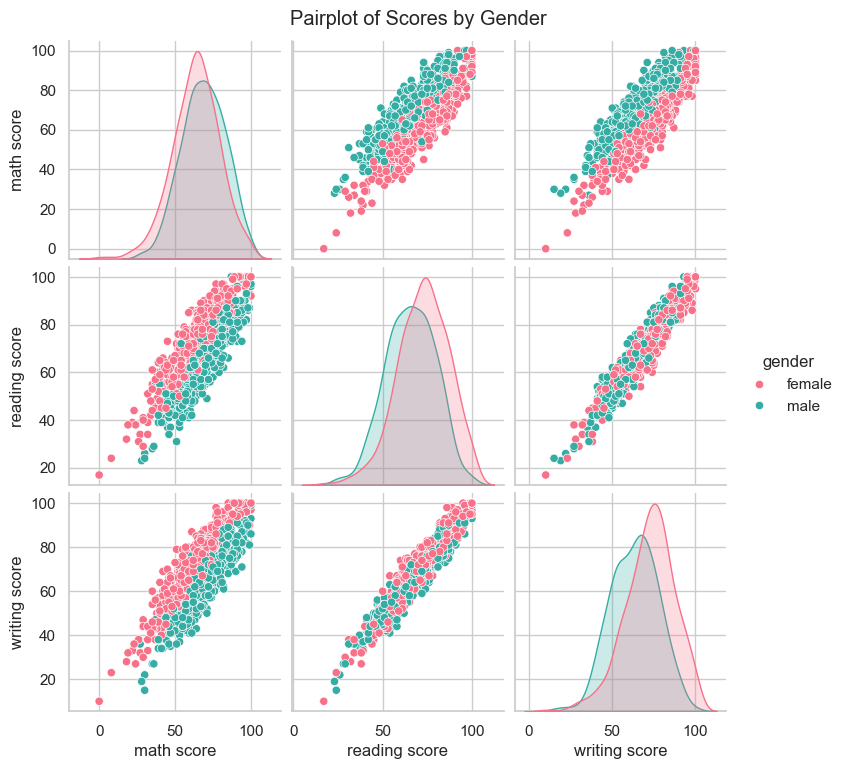

In [24]:

# Pairplot for numerical scores colored by gender
sns.pairplot(df[num_cols + ["gender"]], hue="gender", palette="husl")
plt.suptitle("Pairplot of Scores by Gender", y=1.02)
plt.show()



### Pairplot of Scores by Gender
- The diagonal plots show the **distribution** of scores by subject, split by gender.
- **Math scores**: Males show a slightly higher distribution peak compared to females.
- **Reading and writing scores**: Females generally perform better, with their distributions shifted to the right.
- Off-diagonal scatter plots show **strong positive correlations** among all three subjects, regardless of gender.
- The overlap between genders suggests that while differences exist, they are not extreme.

---


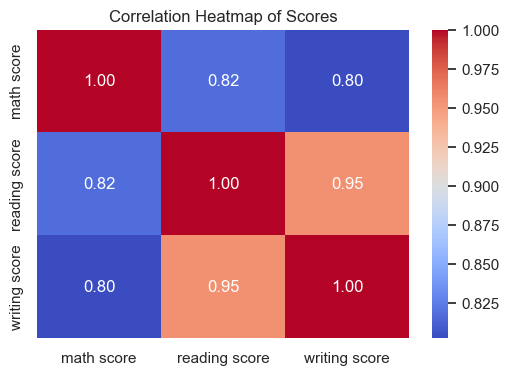

In [25]:
# Correlation heatmap
plt.figure(figsize=(6,4))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Scores")
plt.show()


### Correlation Heatmap of Scores
- **Math vs Reading**: Correlation = **0.82**, showing a strong positive relationship.
- **Math vs Writing**: Correlation = **0.80**, also a strong positive relationship.
- **Reading vs Writing**: Correlation = **0.95**, the strongest correlation, indicating students who score well in reading almost always score well in writing.
- Overall, the heatmap highlights that **all test scores are strongly interrelated**, with reading and writing being the most tightly linked.
